In [1]:
import pandas as pd
import mplfinance as mpf

In [2]:
import rbot

In [3]:
bb = rbot.DummyBb()
bb.log_load(10)


In [4]:
def array_to_df(array):
    ohlcv_df = pd.DataFrame(array, columns=["timestamp", "open", "high", "low", "close", "volume"]) 
    ohlcv_df['timestamp'] = pd.to_datetime((ohlcv_df["timestamp"]), utc=True, unit='ms')
    ohlcv_df = ohlcv_df.set_index('timestamp')

    return ohlcv_df
    

In [5]:
ohlcv = bb.ohlcv(0, bb.log_end_ms, 60*60 * 2)

ohlcv_df = array_to_df(ohlcv)





In [6]:
rbot.PrintTime(bb.log_end_ms)

'2022-06-26-23:59:56.000'

In [7]:
ohlcv_df

,open,high,low,close,volume
timestamp,,,,,
2022-06-17 00:00:00+00:00,20355.0,20897.5,20196.0,20841.0,174619351.0
2022-06-17 02:00:00+00:00,20844.5,21018.0,20286.0,20326.5,112540724.0
2022-06-17 04:00:00+00:00,20327.0,20948.5,20271.0,20767.0,90076688.0
2022-06-17 06:00:00+00:00,20765.5,21239.5,20563.0,21050.5,134518293.0
2022-06-17 08:00:00+00:00,21050.5,21320.0,20832.0,20935.5,101060664.0
...,...,...,...,...,...
2022-06-26 14:00:00+00:00,21385.0,21484.5,21158.5,21305.5,78722828.0
2022-06-26 16:00:00+00:00,21305.5,21423.0,21109.0,21235.0,62274912.0
2022-06-26 18:00:00+00:00,21235.0,21290.0,21092.5,21266.0,40854907.0


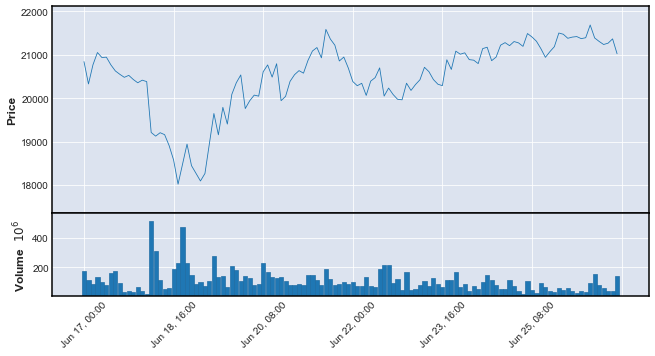

In [8]:

mpf.plot(ohlcv_df, type='line', volume=True, figratio=(16,8))





In [9]:
class Agent:
    def __init__(self):
            self.K = 1.6                            # パラメターKを設定する。
            self.detect_long = False
            self.detect_short = False
            self.doten_size = 0

    def on_tick(self, time_ms, action, price, size):
        if self.detect_long:
            self.detect_long = False
            print(rbot.PrintTime(time_ms) + "Long")
            #return rbot.Order("Buy", price, 10, 600, "Open Long")

        
        if self.detect_short:
            self.detect_short = False
            print(rbot.PrintTime(time_ms) + "short")
            #return rbot.Order("Sell", price, 10, 600, "OpenShort")


    def on_clock(self, time_ms, session):
        ohlcv_array = session.ohlcv(60*60*2, 6)     # 最新足０番目　＋　５本の足を取得。 最新は６番目。
        ohlcv_df = array_to_df(ohlcv_array)         # ndarrayをDataFrameへ変換

        if len(ohlcv_df.index) < 6:                 # データが過去６本分そろっていない場合はリターン
            return 

        print(PrintTime(time_ms) + " ontick")

        ohlcv_df["range"] = ohlcv_df["high"] - ohlcv_df["low"]      # レンジを計算

        ohlcv_latest = ohlcv_df[-2:-1]     # 最新足１本
        ohlcv_last_5 = ohlcv_df[:-2]       # 過去５本足

        range_width = ohlcv_last_5["range"].mean()      #　過去５本足のレンジの平均値

        # Long/Short判定
        self.detect_short = range_width * self.K < ohlcv_latest["high"][0] - ohlcv_latest["open"][0]
        if self.detect_short:
            if 0 < session.long_pos_size:
                self.doten_size = session.long_pos_size * 2


        self.detect_long  = range_width * self.K < ohlcv_latest["open"][0] - ohlcv_latest["low"][0]
        if self.detect_long:
            if 0 < session.short_pos_size:
                self.doten_size = session.short_pos_size * 2


    
    def on_update(self, result):
        print("event", result.status)


In [10]:
agent = Agent()

In [ ]:
bb.run(agent, 60*60*2)

In [ ]:
tr = bb.transactions

In [ ]:
import pandas as pd

In [ ]:
for item in tr:
    print(item)

In [ ]:
timestamp = []
order_id = []
order_sub_id = []
order_type = []
post_only = []
create_time = []
status = []
open_price = []
close_price = []
size = []
volume = []
profit = []
fee = []
total_profit = []
message = []

for item in tr:
    timestamp.append(item.timestamp)
    order_id.append(item.order_id)
    order_sub_id.append(item.order_sub_id)
    order_type.append(item.order_type)
    post_only.append(item.post_only)
    create_time.append(item.create_time)
    status.append(item.status)
    open_price.append(item.open_price)
    close_price.append(item.close_price)
    size.append(item.size)
    volume.append(item.volume)
    profit.append(item.profit)
    fee.append(item.fee)
    total_profit.append(item.total_profit)
    message.append(item.message)





In [ ]:
df = pd.DataFrame(
data = {"timestamp": timestamp, "order_id": order_id, "sub_id": order_sub_id, 
"order_type": order_type, "post_only": post_only, "create_time": create_time,
"status":  status, "open_price": open_price, "close_price": close_price, 
"size": size, "volume": volume, "profit": profit, "fee": fee,
"total_profit":total_profit, "message": message},
columns = ["timestamp", "order_id", "sub_id", "order_type", "post_only",
"create_time", "status", "open_price", "close_price","size", "volume", 
"profit", "fee","total_profit", "message"]
)
df["timestamp"] = pd.to_datetime((df["timestamp"]), utc=True, unit='ms')
df["create_time"] = pd.to_datetime((df["create_time"]), utc=True, unit='ms')


In [ ]:
df

In [ ]:
global_ohlcv

In [ ]:
#index = range(len(agent.ohlcv))
ohlcv_df = pd.DataFrame(agent.ohlcv, columns=["timestamp", "open", "high", "low", "close", "vol"]) #index=index))
ohlcv_df['timestamp'] = pd.to_datetime((ohlcv_df["timestamp"]), utc=True, unit='ms')
#ohlcv_df = df.sort_values("timestamp", ascending=False)



In [ ]:
ohlcv_df

In [ ]:
ohlcv_df["timestamp"]%1_000_00000